<a href="https://colab.research.google.com/github/annstasi/R/blob/main/R_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Уровень счастья в разных странах


**Доклад о мировом счастье — это исследование состояния глобального счастья**

Оценки основаны на ответах на вопрос об оценке жизни. В вопросе удовлетворенностью жизнью респондентам предлагается подумать о лестнице (Кантрила), в которой лучшая возможная жизнь для них равна 10, а худшая возможная жизнь — 0, и оценить свою текущую жизнь по этой шкале.

Колонки, следующие за показателем счастья, оценивают, в какой степени каждый из шести факторов – экономическое производство, социальная поддержка, продолжительность жизни, свобода, отсутствие коррупции и щедрость – способствуют повышению оценок жизни в стране.

In [ ]:
install.packages('tidyverse')
install.packages('ggthemes')
install.packages('plotly')
install.packages('dplyr')
install.packages('factoextra')
install.packages('cluster')
install.packages('maps', dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘httpuv’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/li

In [ ]:
library(ggplot2)
library(factoextra)
library(cluster)
library('tidyverse')
library('ggthemes')
library('plotly')
library('dplyr')
require(maps)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:c

In [ ]:
df<-read.csv('https://raw.githubusercontent.com/annstasi/R/main/world-happiness-report-2021.csv', stringsAsFactors = F)
df <- subset(df, select=c("Country.name", "Regional.indicator", "Ladder.score", "Logged.GDP.per.capita", "Social.support", "Healthy.life.expectancy", "Freedom.to.make.life.choices", "Generosity", "Perceptions.of.corruption", "Dystopia...residual"))
df <- df %>% rename( Country=Country.name, Region=Regional.indicator, Happiness_score=Ladder.score, GDP=Logged.GDP.per.capita, Social_support=Social.support, Life_expectancy=Healthy.life.expectancy, Freedom=Freedom.to.make.life.choices, Corruption=Perceptions.of.corruption, Dystopia_residual=Dystopia...residual)

In [ ]:
str(df)

'data.frame':	149 obs. of  10 variables:
 $ Country          : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Region           : chr  "Western Europe" "Western Europe" "Western Europe" "Western Europe" ...
 $ Happiness_score  : num  7.84 7.62 7.57 7.55 7.46 ...
 $ GDP              : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Social_support   : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Life_expectancy  : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom          : num  0.949 0.946 0.919 0.955 0.913 0.96 0.945 0.907 0.929 0.908 ...
 $ Generosity       : num  -0.098 0.03 0.025 0.16 0.175 0.093 0.086 -0.034 0.134 0.042 ...
 $ Corruption       : num  0.186 0.179 0.292 0.673 0.338 0.27 0.237 0.386 0.242 0.481 ...
 $ Dystopia_residual: num  3.25 2.87 2.84 2.97 2.8 ...


In [ ]:
# Стандартизация данных
data_ST <- scale(df[,-(1:2)])
head(data_ST)

,Happiness_score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Dystopia_residual
1,2.150210,1.158977,1.212083,1.036255,1.388866,-0.5500304,-3.021039,1.5301376
2,1.943491,1.295348,1.212083,1.139774,1.362395,0.2995833,-3.060096,0.8140520
3,1.897864,1.454160,1.107634,1.391177,1.124157,0.2663952,-2.429608,0.7601131
4,1.882034,1.247877,1.464500,1.184139,1.441808,1.1624722,-0.303804,0.9981883
5,1.798230,1.294485,1.107634,1.095409,1.071215,1.2620363,-2.172949,0.6838546
6,1.731186,1.398921,1.212083,1.228505,1.485926,0.7177525,-2.552358,0.2783827


In [ ]:
set.seed(1234)
countries <- kmeans(data_ST, 4)

countries1 <- df
countries1$cluster <- as.factor(countries$cluster) # Добавление колонки с кластерами

head(countries1,3)

# Уровень счастья по кластерам
countries_avg <- countries1 %>%
  group_by(cluster) %>%
  summarize_if(is.numeric, mean, na.rm = TRUE)

,Country,Region,Happiness_score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Dystopia_residual,cluster
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,1
2,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868,1
3,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839,1


In [ ]:
countries_avg[,1:2] # Средний уровень счастья в каждом кластере

cluster,Happiness_score
<fct>,<dbl>
1,6.981769
2,5.781732
3,4.433190
4,4.492484


In [ ]:
countries_max <- countries1 %>%
  group_by(cluster) %>%
  summarize_if(is.numeric, max, na.rm = TRUE)
countries_max[,1:2] # Максимальный уровень счастья в каждом кластере

cluster,Happiness_score
<fct>,<dbl>
1,7.842
2,7.069
3,5.384
4,5.342


In [ ]:
countries_min <- countries1 %>%
  group_by(cluster) %>%
  summarize_if(is.numeric, min, na.rm = TRUE)
countries_min[,1:2] # Минимальный уровень счастья в каждом кластере

cluster,Happiness_score
<fct>,<dbl>
1,5.477
2,4.517
3,3.145
4,2.523


In [ ]:
require(maps)
world_map <- map_data("world") # Информация по странам
head(world_map,3)

# Обработка неточных значений
countries1$Country[countries1$Country == "United Kingdom"] <- "UK"
countries1$Country[countries1$Country == "United States"] <- "USA"
countries1$Country[countries1$Country == "Taiwan Province of China"] <- "Taiwan"
countries1$Country[countries1$Country == "North Cyprus"] <- "Cyprus"
countries1$Country[countries1$Country == "Hong Kong S.A.R. of China"] <- "China"
countries1$Country[countries1$Country == "Congo (Brazzaville)"] <- "Republic of Congo"
countries1$Country[countries1$Country == "Palestinian Territories"] <- "Palestine"

countries_by_cluster <- countries1[,c("Country", "cluster")]
countries_by_cluster$cluster <- as.numeric(countries_by_cluster$cluster)

# Объединение данных
clustering_map <- left_join(countries_by_cluster, world_map, by = c("Country"  = "region"), keep = TRUE, relationship =
  "many-to-many")

clustering_map %>% filter (is.na(region))

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-69.89912,12.45200,1,1,Aruba,NA
2,-69.89571,12.42300,1,2,Aruba,NA
3,-69.94219,12.43853,1,3,Aruba,NA


Country,cluster,long,lat,group,order,region,subregion
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>


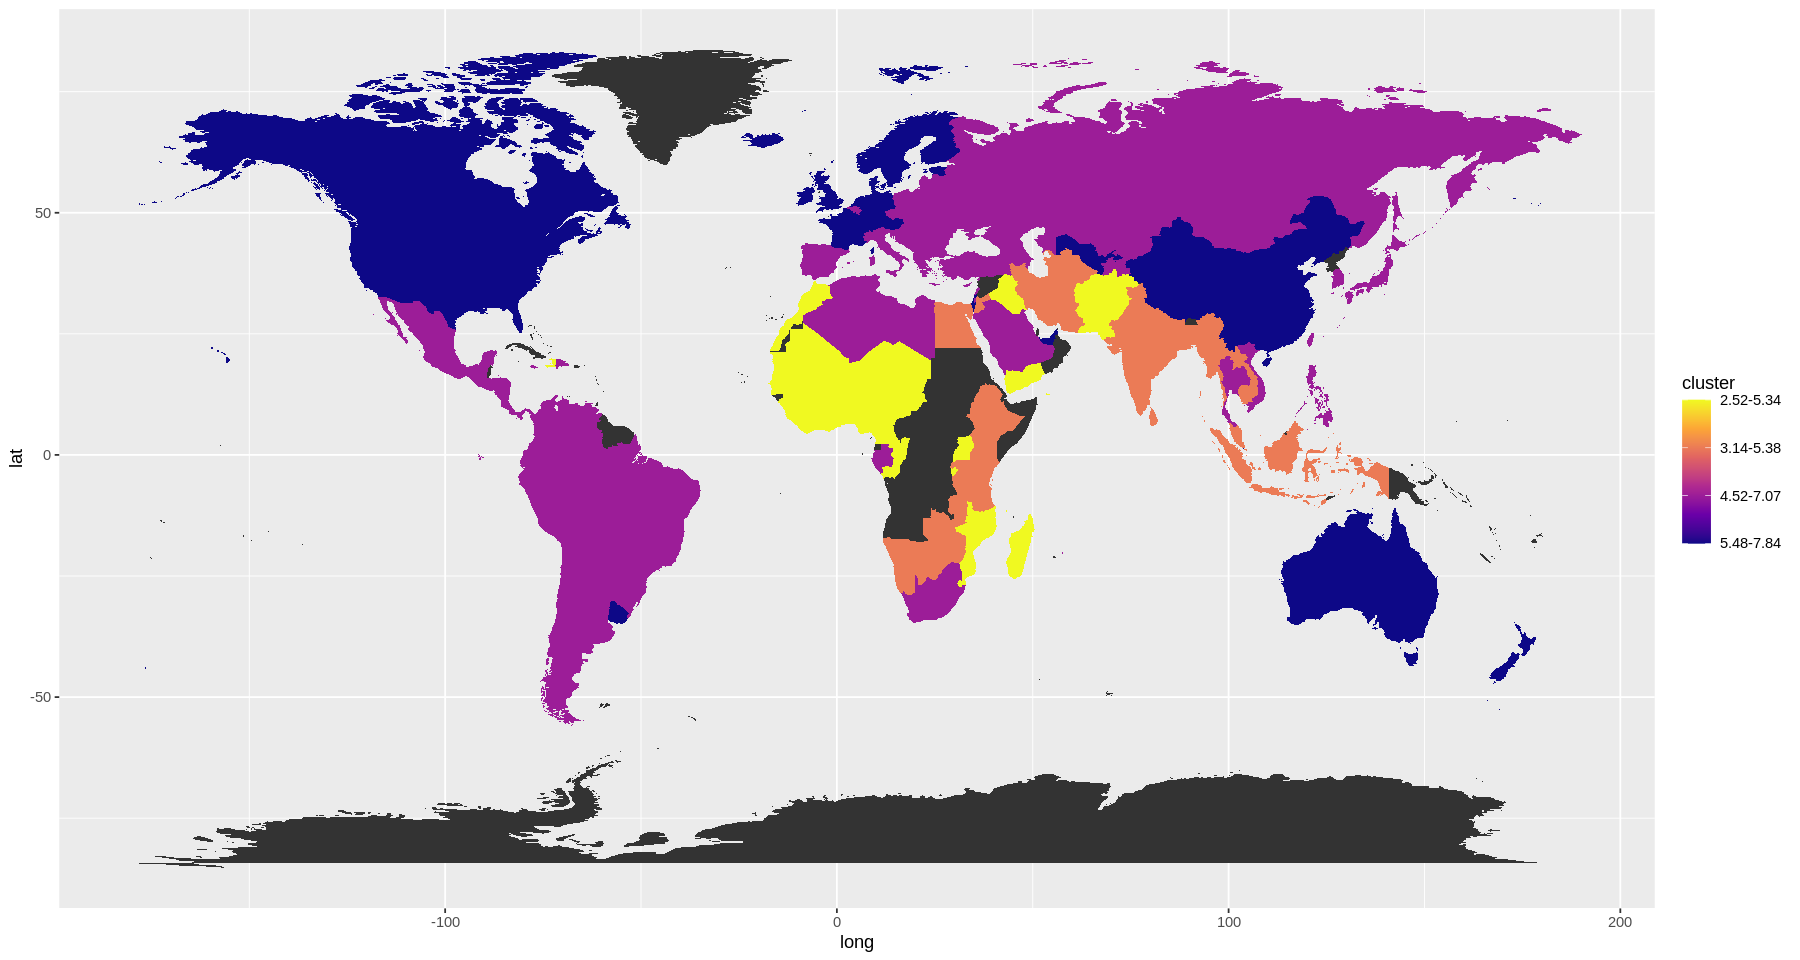

In [ ]:
# Визуализация кластеров на карте
all.layer <- geom_polygon(data = world_map, aes(long, lat, group = group))

ggplot(clustering_map, aes(long, lat, group = group))+
  all.layer +
  geom_polygon(aes(fill = cluster)) +
  scale_fill_viridis_c(option = "C", labels=c("5.48-7.84", "4.52-7.07", "3.14-5.38", "2.52-5.34")) # Разбить на кластеры по цветам